# Baseline

In [30]:
# Data viz
import matplotlib.pyplot as plt

# Data manipulation
import pandas as pd

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, recall_score, RocCurveDisplay
from sklearn.preprocessing import StandardScaler

In [31]:
data_train = pd.read_csv("../data/conversion_data_train.csv")
display(data_train.head())

,country,age,new_user,source,total_pages_visited,converted
0,China,22,Yes,Direct,2,0
1,UK,21,Yes,Ads,3,0
2,Germany,20,No,Seo,14,1
3,US,23,Yes,Seo,3,0
4,US,28,Yes,Direct,3,0


## Train dataset

This baseline will be a Logistic Regression model taking into account only the `total_pages_visited` column, as the EDA has shown that she is correlated with the `converted` target variable.

#### Training and predictions

In [32]:
target = "converted"

x = data_train[["total_pages_visited"]]
y = data_train[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [33]:
preprocessor = StandardScaler()

x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

In [34]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

#### Performance assessment

In [35]:
scores = cross_val_score(model, x_train, y_train, cv=3)
print("The cross-validated mean score is : ", scores.mean())
print("The standard deviation is : ", scores.std())

The cross-validated mean score is :  0.9831593927893737
The standard deviation is :  0.0003079095890140522


In [36]:
print("f1-score on training set : ", f1_score(y_train, y_train_pred))
print("recall_score on training set : ", recall_score(y_train, y_train_pred))
print()
print("f1-score on test set : ", f1_score(y_test, y_test_pred))
print("recall_score on test set : ", recall_score(y_test, y_test_pred))

f1-score on training set :  0.6990580847723705
recall_score on training set :  0.6063453159041394

f1-score on test set :  0.6792929292929293
recall_score on test set :  0.5860566448801743


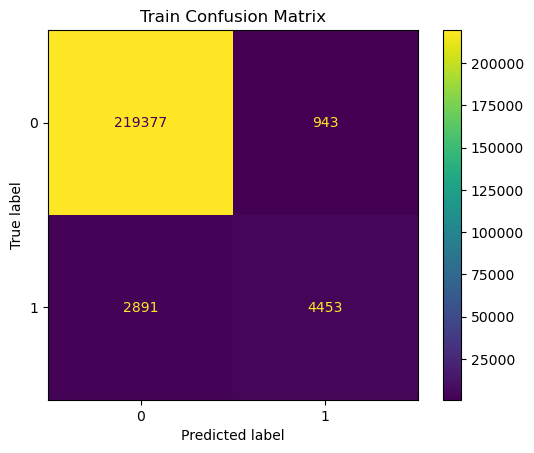

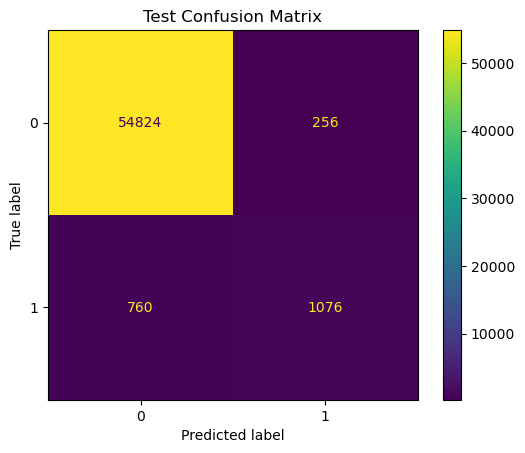

In [37]:
_, ax = plt.subplots()
ax.set(title="Train Confusion Matrix")
ConfusionMatrixDisplay.from_estimator(model, x_train, y_train, ax=ax)
plt.show()

_, ax = plt.subplots()
ax.set(title="Test Confusion Matrix")
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, ax=ax)
plt.show()

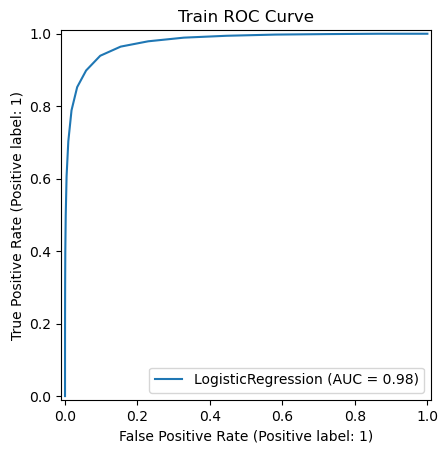

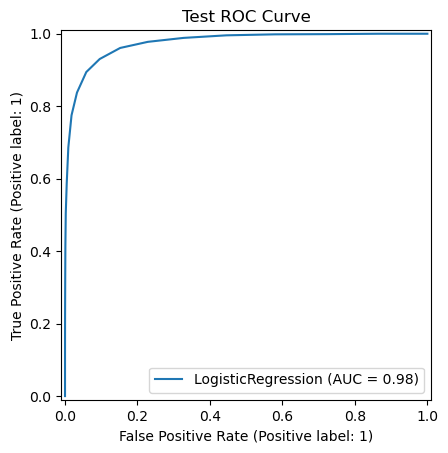

In [38]:
_, ax = plt.subplots()
ax.set(title="Train ROC Curve")
RocCurveDisplay.from_estimator(model, x_train, y_train, ax=ax)
plt.show()

_, ax = plt.subplots()
ax.set(title="Test ROC Curve")
RocCurveDisplay.from_estimator(model, x_test, y_test, ax=ax)
plt.show()

Very marked class imbalance: class 0 is very well predicted, but class 1 is detected much less successfully.

Good model stability (low standard deviation in cross-validation).

These results underline the need to take class imbalance into account.

## Test dataset

### Predictions

In [39]:
data_test = pd.read_csv("../data/conversion_data_test.csv")

x_test = data_test[["total_pages_visited"]]
x_test = preprocessor.transform(x_test)

y_test = pd.read_csv("../data/conversion_data_test_labels.csv")
y_pred = model.predict(x_test)

print("f1-score on set without labels : ", f1_score(y_test, y_pred))
print("recall_score on set without labels : ", recall_score(y_test, y_pred))

f1-score on set without labels :  0.6942242355605889
recall_score on set without labels :  0.6009803921568627


### Performance assessment

In [40]:
scores_df = pd.DataFrame(columns = ["model", "f1", "recall"])
new_rows = [{"model": "baseline", "f1": f1_score(y_test, y_pred), "recall": recall_score(y_test, y_pred)}]
scores_df = pd.concat([scores_df, pd.DataFrame(new_rows)], ignore_index=True)
scores_df.to_csv("../data/scores.csv", mode="w", index=False)

/var/folders/yt/qrbwlc0x6fj2rs4chrxkrm_m0000gn/T/ipykernel_79590/1234022173.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scores_df = pd.concat([scores_df, pd.DataFrame(new_rows)], ignore_index=True)
